<a href="https://colab.research.google.com/github/jesyraf/Python-projects/blob/main/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing pandas library
import pandas as pd


In [ ]:
#mounting google drive to google colab
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#loading the database
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/dane.csv')

In [ ]:
#I had some problems with merging two csv files in pandas so I figured it would be more efficient if I used my Excel knowledge and created a ready database myself through the CONCAT function
df.head()

,API_Name,Engine,Region,Average_instances_running,Reserved_instances
0,db.r5.2xlarge,Oracle,ap-southeast-2,1.0,3.0
1,db.r5.large,Oracle,ap-southeast-1,1.1,6.0
2,db.m4.4xlarge,Oracle,ap-southeast-1,1.1,2.0
3,db.t3.small,MySQL,ap-southeast-1,1.7,5.0
4,db.m3.xlarge,Microsoft,ap-southeast-1,5.0,1.0


In [ ]:
#grouping dataset by region
regsum = df.groupby(['Region'])[['Average_instances_running', 'Reserved_instances']].sum()
print(regsum)

                Average_instances_running  Reserved_instances
Region                                                       
ap-southeast-1                      422.6               532.0
ap-southeast-2                       21.0                53.0
eu-west-1                            44.0                74.0


In [ ]:
#grouping dataset by API names
apisum = df.groupby(['API_Name'])[['Average_instances_running', 'Reserved_instances']].sum()
print(apisum)

                Average_instances_running  Reserved_instances
API_Name                                                     
db.m3.large                           0.0                 2.0
db.m3.medium                          0.1                 4.0
db.m3.xlarge                          7.0                 2.0
db.m4.10xlarge                        1.0                 3.0
db.m4.16xlarge                       22.4                20.0
db.m4.2xlarge                         4.1                 8.0
db.m4.4xlarge                         9.2                 8.0
db.m4.large                          54.4                64.0
db.m4.xlarge                         51.6                65.0
db.m5.16xlarge                        1.0                 1.0
db.m5.2xlarge                        23.8                22.0
db.m5.4xlarge                        17.1                14.0
db.m5.8xlarge                         3.3                 6.0
db.m5.large                          33.7                15.0
db.m5.xl

In [ ]:
#grouping dataset by Engines
engsum = df.groupby(['Engine'])[['Average_instances_running', 'Reserved_instances']].sum()
print(engsum)

            Average_instances_running  Reserved_instances
Engine                                                   
Amazon                           19.5                39.0
MariaDB                          47.5                67.0
Microsoft                        46.2                59.0
MySQL                            48.2                83.0
Oracle                          300.9               369.0
PostgreSql                       25.3                42.0


In [ ]:
#creating dataframe with just Oracle data
oracle = df[df['Engine']=='Oracle']
print(oracle)

          API_Name  Engine          Region  Average_instances_running  \
0    db.r5.2xlarge  Oracle  ap-southeast-2                        1.0   
1      db.r5.large  Oracle  ap-southeast-1                        1.1   
2    db.m4.4xlarge  Oracle  ap-southeast-1                        1.1   
12   db.r4.2xlarge  Oracle  ap-southeast-1                        3.1   
16     db.m5.large  Oracle  ap-southeast-1                        1.7   
..             ...     ...             ...                        ...   
178   db.r5.xlarge  Oracle  ap-southeast-1                        4.9   
179    db.m4.large  Oracle  ap-southeast-1                        7.2   
180  db.m4.2xlarge  Oracle  ap-southeast-1                        1.0   
181    db.m5.large  Oracle  ap-southeast-1                        0.0   
183    db.r5.large  Oracle  ap-southeast-1                        5.1   

     Reserved_instances  
0                   3.0  
1                   6.0  
2                   2.0  
12                 

In [ ]:
#Calculating Oracle total running and total reserved instances in each Region
oragrup = oracle.groupby(['Region'])[['Average_instances_running', 'Reserved_instances']].sum()
print(oragrup)

                Average_instances_running  Reserved_instances
Region                                                       
ap-southeast-1                      250.4               274.0
ap-southeast-2                        8.5                25.0
eu-west-1                            42.0                70.0


In [ ]:
#adding new column Over Reserved
oragrup['Over_Reserved'] = oragrup.apply(lambda row: row.Average_instances_running - row.Reserved_instances, axis=1)
print(oragrup)

                Average_instances_running  Reserved_instances  Over_Reserved
Region                                                                      
ap-southeast-1                      250.4               274.0          -23.6
ap-southeast-2                        8.5                25.0          -16.5
eu-west-1                            42.0                70.0          -28.0


In [ ]:
#importing matplotlib library to create bar plot
import matplotlib.pyplot as plt

In [ ]:
#sorting values descending
oragrup_sorted = oragrup.sort_values('Over_Reserved',ascending=False)

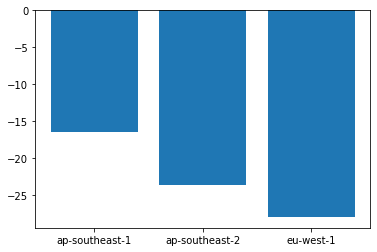

In [ ]:
#creating bar blot
plt.bar(['ap-southeast-1','ap-southeast-2','eu-west-1'], oragrup_sorted['Over_Reserved'])
plt.show()